In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Quadratic Equation Aanalysis with Neural Networks

Neural Networks are a great way to analyze mathematical solutions, they provide a shorthand to classical analytical methods and eventually analytical methods to classically hard problems. Now We are starting with a simple system, which is to analyze the Quadratic Equation. 

## Real vs Complex Solutions:

We will start with trainting a neural network to classify whether the equation would have a real or complex solution. For that we will gather a lot of data by hand and then train a neural network over that. 

Consider a quadratic equation given by 
\begin{align}
ax^2 + bx + c = 0
\end{align}

These $a$ and $b$ are called the _cofficients_ of the equations. Two numbers (real or complex) are called _roots_ of the polynomial if they satisfy the equation.

There is a simple rule to determine whether the equation will have real or complex solutions. That is:

$$D = b^2 - 4ac$$

then if $D\ge0$ then the equation will have __Real__ solutions if $D<0$ then the equation will have complex solutions. 

### Making the Neural Network:

To train an NN we will do following steps:
 
- Make the data
- Preprocess the data
- Make the neural network
- Compile the network
- Train the network
- Predict the values

#### Step1: Make the Data

To make the data we take the rabdom coffs. Not that $a>0$, then we did the the compuation for $D$ for every combination and create the labels for them.

In [45]:
N = 30000 #total length of the training set

train_samples = np.zeros((N, 3))
train_label = np.zeros(N)

train_samples[:,0] = np.random.randint(1,6,size=N)
train_samples[:,1] = np.random.randint(-10,10,size=N)
train_samples[:,2] = np.random.randint(-10,10,size=N)

#setting the label according to the condition
#0 means real solution, 1 means complex solution,

for i in range(N):
    a, b, c = train_samples[i]
    
    D = b**2 - 4*a*c
    if D>=0:
        train_label[i] = 0
    else:
        train_label[i] = 1

#### Step 2: Preprocessing the data

Now we need to preprocess the data in such a way that it works the best way with the neural network. The first thing we need to do that, we need to scale the samples from $(-10,10)$ to $(0,1)$.

In [46]:
train_samples,train_label = shuffle(train_samples, train_label)

scaler = MinMaxScaler(feature_range=(0,1))
train_samples_rescaled = scaler.fit_transform(train_samples)

#### Step 3: Making a neural network

We will make a four layer Neural Network with the coffs as input. 

- The input shape is (3,1)
- The output shape of 2 being `real` and `complex`

In [47]:
model = Sequential()

model.add(Dense(16,input_shape=(3,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))

#### Step 4: Compiling the network

In [48]:
train_label_2 = np.zeros((N,2))
train_label_2[:,0] = [1 if i==0 else 0 for i in train_label]
train_label_2[:,1] = [1 if i==1 else 0 for i in train_label]

In [49]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

#### Step 5: Training the network

In [50]:
model.fit(x=train_samples_rescaled, y=train_label_2,batch_size=10,shuffle=True,epochs=30,verbose=2)

Epoch 1/30
3000/3000 - 2s - loss: 0.5566 - accuracy: 0.7338 - 2s/epoch - 786us/step
Epoch 2/30
3000/3000 - 2s - loss: 0.3174 - accuracy: 0.8789 - 2s/epoch - 657us/step
Epoch 3/30
3000/3000 - 2s - loss: 0.2271 - accuracy: 0.9066 - 2s/epoch - 597us/step
Epoch 4/30
3000/3000 - 2s - loss: 0.1918 - accuracy: 0.9223 - 2s/epoch - 604us/step
Epoch 5/30
3000/3000 - 2s - loss: 0.1681 - accuracy: 0.9343 - 2s/epoch - 601us/step
Epoch 6/30
3000/3000 - 2s - loss: 0.1492 - accuracy: 0.9463 - 2s/epoch - 597us/step
Epoch 7/30
3000/3000 - 2s - loss: 0.1336 - accuracy: 0.9549 - 2s/epoch - 600us/step
Epoch 8/30
3000/3000 - 2s - loss: 0.1210 - accuracy: 0.9616 - 2s/epoch - 602us/step
Epoch 9/30
3000/3000 - 2s - loss: 0.1107 - accuracy: 0.9644 - 2s/epoch - 598us/step
Epoch 10/30
3000/3000 - 2s - loss: 0.1023 - accuracy: 0.9671 - 2s/epoch - 602us/step
Epoch 11/30
3000/3000 - 2s - loss: 0.0952 - accuracy: 0.9706 - 2s/epoch - 597us/step
Epoch 12/30
3000/3000 - 2s - loss: 0.0891 - accuracy: 0.9721 - 2s/epoch - 

In [51]:
model.fit(x=train_samples_rescaled, y=train_label_2,batch_size=10,validation_split=0.3,shuffle=True,epochs=30,verbose=2)

Epoch 1/30
2100/2100 - 2s - loss: 0.0378 - accuracy: 0.9927 - val_loss: 0.0401 - val_accuracy: 0.9936 - 2s/epoch - 901us/step
Epoch 2/30
2100/2100 - 2s - loss: 0.0368 - accuracy: 0.9936 - val_loss: 0.0392 - val_accuracy: 0.9927 - 2s/epoch - 813us/step
Epoch 3/30
2100/2100 - 2s - loss: 0.0360 - accuracy: 0.9933 - val_loss: 0.0389 - val_accuracy: 0.9941 - 2s/epoch - 900us/step
Epoch 4/30
2100/2100 - 2s - loss: 0.0351 - accuracy: 0.9937 - val_loss: 0.0378 - val_accuracy: 0.9934 - 2s/epoch - 962us/step
Epoch 5/30
2100/2100 - 2s - loss: 0.0343 - accuracy: 0.9947 - val_loss: 0.0369 - val_accuracy: 0.9934 - 2s/epoch - 903us/step
Epoch 6/30
2100/2100 - 2s - loss: 0.0334 - accuracy: 0.9948 - val_loss: 0.0365 - val_accuracy: 0.9936 - 2s/epoch - 880us/step
Epoch 7/30
2100/2100 - 2s - loss: 0.0327 - accuracy: 0.9950 - val_loss: 0.0351 - val_accuracy: 0.9951 - 2s/epoch - 950us/step
Epoch 8/30
2100/2100 - 2s - loss: 0.0321 - accuracy: 0.9950 - val_loss: 0.0345 - val_accuracy: 0.9940 - 2s/epoch - 921

#### Step 5: Predicting the network by values

Prepare the data as same as the training

In [48]:
N = 3 #total length of the training set

test_samples = np.zeros((N, 3))
test_label = np.zeros(N)

test_samples[:,0] = np.random.randint(1,6,size=N)
test_samples[:,1] = np.random.randint(-10,10,size=N)
test_samples[:,2] = np.random.randint(-10,10,size=N)

#setting the label according to the condition
#0 means real solution, 1 means complex solution

for i in range(N):
    a, b, c = test_samples[i]
    
    D = b**2 - 4*a*c
    if D>=0:
        test_label[i] = 0
    else:
        test_label[i] = 1
        
##### Preprocess the data also the same way as training

test_samples,test_label = shuffle(test_samples, test_label)

scaler = MinMaxScaler(feature_range=(0,1))
test_samples_rescaled = scaler.fit_transform(test_samples)

In [10]:
predictions = model.predict(x=test_samples_rescaled,batch_size=10, verbose=0)

In [11]:
predictions_arg = np.argmax(predictions, axis=-1)

In [12]:
predictions_arg

array([0, 1, 0, ..., 0, 0, 0])

In [13]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
cm_plot_labels = ['real','complex']

Confusion matrix, without normalization
[[2058   16]
 [   0  926]]


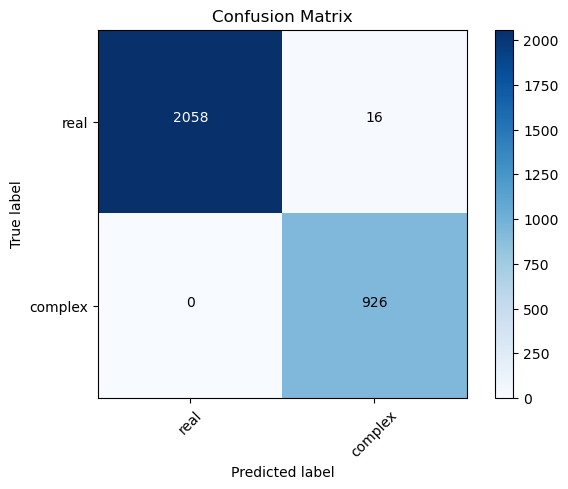

In [15]:
cm = confusion_matrix(y_true=test_label, y_pred=predictions_arg)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix');

#### Is that fine:

Yeah I know the results look pretty good when looked from above but does that really work? Let's test with some basic equations:

- square root of two $x^2-2=0$: $a=1, b=0, c=-2$, real
- Equation for golden ratio: $x^2 -x -1 = 0$, real
- Cube roots of unity: $x^2 + x+ 1 = 0$, complex

In [43]:
N = 1#total length of the training set

def guess_roots(a,b,c):

    test_sample = np.zeros((N, 3))
    test_label = np.zeros(N)

    test_sample[:,0] = a
    test_sample[:,1] = b
    test_sample[:,2] = c

    print(test_sample)

    predictions = model.predict(x=test_sample,verbose=0)
    predictions_arg = np.argmax(predictions, axis=-1)

    if predictions_arg[0] == 0:
        print("The roots are real")
    else:
        print("The roots are complex")
        
        
guess_roots(1,0,-2) #roots of two
guess_roots(1,0,1) #iota
guess_roots(1,1,1) #cube roots of unity
guess_roots(1,-1,-1)#golden ratio

[[ 1.  0. -2.]]
The roots are real
[[1. 0. 1.]]
The roots are complex
[[1. 1. 1.]]
The roots are complex
[[ 1. -1. -1.]]
The roots are real


# Predicting the roots with Neural Networks

We would now want to predict the solutions. We will still prepare the date with the same way. Now we would need to handle the complex and real roots saperately. For real roots, $D>0$. Now with that we will get two roots as:

$$x_1 = \frac{-b + \sqrt D}{2a}, \quad x_2 = \frac{-b - \sqrt D}{2a}$$

With complex roots, the imaginary part would not be mixed with the real part so the two solutions would be:

$$x_3 = -\frac{b}{2a} + \iota \frac{\sqrt D}{2a}, \quad x_4 = -\frac{b}{2a} - \iota \frac{\sqrt D}{2a}$$

For the real part the two roots would be different(could be same if $D =0$), so we need to predict them saperately. But for the two complex parts, they are compelx conjugates of each other. So for them, we need to calculate real and imagninary part saperately. So the output neurons would be like those:
- $x_1 = \dfrac{-b + \sqrt D}{2a}$
- $x_2 = \dfrac{-b - \sqrt D}{2a}$
- $x_3 = -\dfrac{b}{2a}$
- $x_4 = \dfrac{\sqrt D}{2a}$

So if the equation has real solutions then the solutions would simply be $x_1$ and $x_2$ and if the equation has complex solutions then the solutions would be $x_3 + \iota x_4$ and $x_3 - \iota x_4$

In [52]:
N = 30000 #total length of the training set

train_samples = np.zeros((N,2))
train_label = np.zeros((N,2))

train_samples[:,0] = np.random.randint(-10,10,size=N)
train_samples[:,1] = np.random.randint(-10,10,size=N)

def f(x):
    a = 1
    b = x[0]
    c = x[1]
    
    D = b**2 - 4*a*c
    
    return -b/(2*a), np.sqrt(abs(D)/2*a)


for i in range(N):
    train_label[i] = f(train_samples[i])

In [53]:
train_samples,train_label = shuffle(train_samples, train_label)

scaler = MinMaxScaler(feature_range=(0,1))
train_samples_rescaled = scaler.fit_transform(train_samples)

In [91]:
model2 = Sequential()

model2.add(Dense(100,input_shape=(2,),activation='sigmoid'))
model2.add(Dense(100,activation='sigmoid'))
model2.add(Dense(100,activation='sigmoid'))
model2.add(Dense(100,activation='sigmoid'))
model2.add(Dense(2,activation='linear'))

In [92]:
model2.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

In [93]:
model2.fit(x=train_samples_rescaled, y=train_label,batch_size=10,shuffle=True,epochs=30)

Epoch 1/30
3000/3000 [==============================] - 3s 827us/step - loss: 5.9495
Epoch 2/30
3000/3000 [==============================] - 2s 825us/step - loss: 3.8048
Epoch 3/30
3000/3000 [==============================] - 3s 892us/step - loss: 1.1376
Epoch 4/30
3000/3000 [==============================] - 2s 762us/step - loss: 0.7667
Epoch 5/30
3000/3000 [==============================] - 3s 940us/step - loss: 0.6021
Epoch 6/30
3000/3000 [==============================] - 3s 984us/step - loss: 0.3968
Epoch 7/30
3000/3000 [==============================] - 3s 881us/step - loss: 0.3310
Epoch 8/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2980
Epoch 9/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2799
Epoch 10/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2639
Epoch 11/30
3000/3000 [==============================] - 3s 927us/step - loss: 0.2424
Epoch 12/30
3000/3000 [==============================] - 3s 886us/ste

In [94]:
model2.fit(x=train_samples_rescaled, y=train_label,batch_size=10,validation_split=0.2,shuffle=True,epochs=50,verbose=1)

Epoch 1/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 2/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 3/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 4/50
2400/2400 [==============================] - 2s 974us/step - loss: 0.0097 - val_loss: 0.0086
Epoch 5/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 6/50
2400/2400 [==============================] - 2s 982us/step - loss: 0.0091 - val_loss: 0.0080
Epoch 7/50
2400/2400 [==============================] - 2s 979us/step - loss: 0.0089 - val_loss: 0.0081
Epoch 8/50
2400/2400 [==============================] - 2s 975us/step - loss: 0.0086 - val_loss: 0.0077
Epoch 9/50
2400/2400 [==============================] - 2s 946us/step - loss: 0.0084 - val_loss: 0.0076
Epoch 10/50
2400/2400 [==============================] - 2s 941us/step -

In [104]:
def guess_roots(a,b,c):

    test_sample = np.zeros((1, 2))

    test_sample[:,0] = b/a
    test_sample[:,1] = c/a
    a = 1

    print(test_sample)
    
    print(f(test_sample[0]))
    print(model2.predict(test_sample))
    
    

In [106]:
guess_roots(1,0,-1)

[[ 0. -1.]]
(-0.0, 1.4142135623730951)
1/1 [==============================] - 0s 14ms/step
[[4.15878  8.886179]]


In [ ]:
f()